In [1]:
import pandas as pd
import datetime

#### Read Files to Clean and Merge

In [2]:
jobOrder = pd.read_csv('jobOrder.csv', 
                        sep='|', 
                        encoding='cp1252',
                        decimal=',', 
                        infer_datetime_format=True, 
                        parse_dates=[27,29,31])
jobOrder.head()

C:\Users\gltel\AppData\Local\Temp\ipykernel_7408\3988613148.py:1: DtypeWarning: Columns (2,25) have mixed types. Specify dtype option on import or set low_memory=False.
  jobOrder = pd.read_csv('jobOrder.csv',


,CONF_CODE,ORDER_ROW,JO_PROG,STATE,CUST_CODE,PRESCRIPTION,PRIORITY_COMP,PRODUCT_CODE,MATERIAL_CODE,BATCH_NUMBER,...,MEAS_STEEP_RADIUS,TRAY_CODE,STERIL_CODE,STERIL_BATCH,LABEL_PRINTED,SCHEDULED_DATE,SCHEDULED_QTY,LAUNCH_DATE,REJECTS_QTY,DELIVERY_DATE
0,AA0001,1,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,NaN,607.0,1.0,8492.0,1.0,2012-03-05 08:37:00,1.0,2012-03-05 08:37:00,0.0,NaT
1,AA0001,2,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,NaN,607.0,1.0,8492.0,1.0,2012-03-05 08:37:00,1.0,2012-03-05 08:37:00,0.0,NaT
2,AA0001,3,0,6.0,CFR63516,2.0,0.0,U3_ACTIVO,2001.0,13858,...,NaN,617.0,2.0,5654.0,1.0,2012-03-05 08:37:00,1.0,2012-03-13 01:35:00,3.0,2012-03-14 20:22:00
3,AA0001,4,0,6.0,CFR63516,2.0,0.0,U3_ACTIVO,2001.0,13858,...,NaN,623.0,2.0,5630.0,1.0,2012-03-05 08:37:00,1.0,2012-03-07 11:08:00,1.0,2012-03-09 13:30:00
4,AA0001,5,0,6.0,CFR63516,2.0,253.0,U3_ACTIVO,2001.0,13833,...,NaN,607.0,1.0,8492.0,1.0,2012-03-05 08:37:00,1.0,2012-03-05 08:37:00,0.0,NaT


In [3]:
OrderRow = pd.read_csv('OrderRow.csv',
                       sep='|',
                       encoding='cp1252')
OrderRow.head()

,CONF_CODE,ORDER_ROW,TEC_INST
0,AA0001,1,"510482,3,U3E"
1,AA0001,2,"510482,3,U3E"
2,AA0001,3,"510482,3,U3E"
3,AA0001,4,"510482,9,U3E"
4,AA0001,5,"510482,9,U3E"


In [4]:
Articulos = pd.read_csv('Articulos.csv',
                        sep = '|',
                        encoding = 'latin-1')
Articulos.head()

,ItemCode,ItemName,LinProd,CodFam,CodSubFam,Desing,FrozenFor
0,001,Varios de compras,NaN,NaN,NaN,NoDesing,N
1,002,SEVEN 12pk T/MF x20,1023.0,10.0,8.0,NoDesing,N
2,003,Voucher Mylo&Edof 3pk x300,1022.0,10.0,8.0,NoDesing,N
3,004,Checkbook 50 EyeGo Bio Fresh 6pk A T & MF,1023.0,10.0,8.0,NoDesing,N
4,005,Checkbook 10 EyeGo Bio Fresh 6pk A T & MF,1023.0,10.0,8.0,NoDesing,N


In [5]:
LineasProd = pd.read_csv('LineasProd.csv',
                         sep = '|')
LineasProd.head()

,Code,Name
0,3,3T
1,7,5T
2,1009,BLU:GEN
3,1010,BLU:KIDZ
4,1011,BLU:SSENTIAL


In [6]:
Familias = pd.read_csv('Familias.csv',
                       sep = '|')
Familias.head()

,Code,Name
0,3,CONVENCIONAL
1,4,CREDITOS
2,9,CURSOS
3,6,DESCUENTOS
4,15,DIARIAS


In [7]:
SubFamilias = pd.read_csv('SubFamilias.csv',
                          sep = '|')
SubFamilias.head()

,Code,Name
0,2,ASPHERIC
1,9,CREDITOS
2,15,CURSOS
3,11,DESCUENTO
4,7,GAS PERMEABLE


#### Remove unnecesary columns
Remove columns that are not useful for made to stock problem and that with discussion with the company were determined irrelevant.

In [8]:

jobOrder = jobOrder[['CONF_CODE','ORDER_ROW','JO_PROG',
                     'PRODUCT_CODE','MATERIAL_CODE',
                     'BASE_RADIUS','POWER','CYLINDER','POWER_AXIS','DIAMETER','CENTER_THK',
                     'LAUNCH_DATE']]

#### Check behaviour of parameters and job order quantity over time

In [9]:
import matplotlib.pyplot as plt

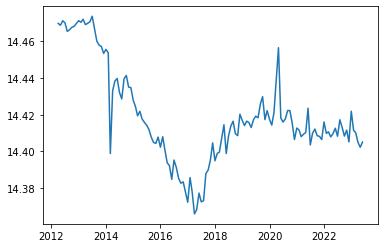

In [10]:
monthly_data = jobOrder[['LAUNCH_DATE', 'DIAMETER']].resample('M', on='LAUNCH_DATE').mean()
plt.plot(monthly_data)

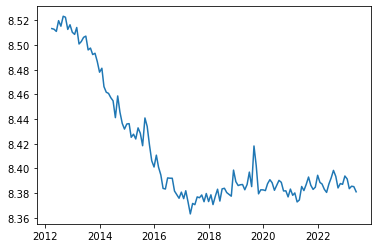

In [11]:
monthly_data = jobOrder[['LAUNCH_DATE', 'BASE_RADIUS']].resample('M', on='LAUNCH_DATE').mean()
plt.plot(monthly_data)

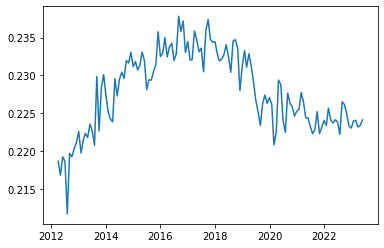

In [12]:
monthly_data = jobOrder[['LAUNCH_DATE', 'CENTER_THK']].resample('M', on='LAUNCH_DATE').mean()
plt.plot(monthly_data)

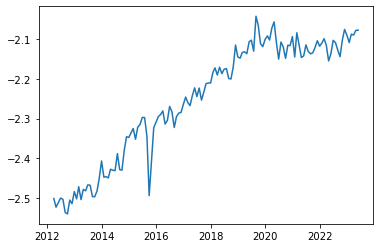

In [13]:
monthly_data = jobOrder[['LAUNCH_DATE', 'CYLINDER']].resample('M', on='LAUNCH_DATE').mean()
plt.plot(monthly_data)

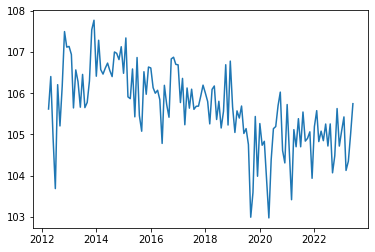

In [14]:
monthly_data = jobOrder[['LAUNCH_DATE', 'POWER_AXIS']].resample('M', on='LAUNCH_DATE').mean()
plt.plot(monthly_data)

We decide to only use last 3 years of data, the parameters are not stationary in the mean for data older than 3 years, which means that considering that data for predicting which parameter combinations will be ordered in the future has higher chances of leading to error.

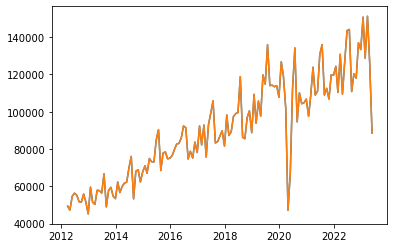

In [15]:
monthly_data = jobOrder[['LAUNCH_DATE', 'PRODUCT_CODE']].resample('M', on='LAUNCH_DATE').count()
plt.plot(monthly_data)

Overall demand has been steadily increasing for the past 11 years, we will assume this trend to continue for forecasting the future total demand of products.

In [16]:
jobOrder = jobOrder[jobOrder['LAUNCH_DATE'] > datetime.datetime(2019, 12, 31)]

#### Merge jobOrder with other files to get Item Name, Line, Family and Subfamily
Merge to obtain the hierarchy information of each product, this is an important feature for clustering combinations in the following steps.

In [17]:
# Extract ItemCode from TEC_INST so the table can be joined with Articulos.
OrderRow['ItemCode'] = OrderRow['TEC_INST'].str.split(',').str[2]

In [18]:
# Remove NAs in ItemCode to avoid a join when the field is NA in both tables
OrderRow = OrderRow[OrderRow['ItemCode'].notna()]

In [19]:
# Join table with Articulos then drop unwanted features.
OrderRow = pd.merge(OrderRow, Articulos, on=['ItemCode'], how='left').drop(['TEC_INST','Desing','FrozenFor'],axis=1)

In [20]:
# Join resulting table with jobOrder to add ItemName, LinProd, CodFam, CodSubFam
jobOrder = pd.merge(jobOrder, 
                    OrderRow,
                    on=['CONF_CODE','ORDER_ROW'],
                    how='left')

#### Check products customizable to all parameters and without Cylinder and Power Axis
Classify products into those that can be customized with all parameters, and those that cannot be customized by Cylinder and Power Axis, then remove, if any, products that cannot be clearly classified.

In [21]:
# Check if NAs and total product counts match to conclude that NAs mean the product is not customizable.
na_counts = jobOrder.groupby(['PRODUCT_CODE'])['CYLINDER', 'POWER_AXIS'].apply(lambda x: x.isna().sum())
counts = jobOrder.groupby(['PRODUCT_CODE'])['CYLINDER', 'POWER_AXIS'].count()
na_counts = pd.merge(na_counts, counts, left_index=True, right_index=True, how='outer')

C:\Users\gltel\AppData\Local\Temp\ipykernel_7408\4006105692.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  na_counts = jobOrder.groupby(['PRODUCT_CODE'])['CYLINDER', 'POWER_AXIS'].apply(lambda x: x.isna().sum())
C:\Users\gltel\AppData\Local\Temp\ipykernel_7408\4006105692.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts = jobOrder.groupby(['PRODUCT_CODE'])['CYLINDER', 'POWER_AXIS'].count()


In [22]:
na_counts.head()

,CYLINDER_x,POWER_AXIS_x,CYLINDER_y,POWER_AXIS_y
PRODUCT_CODE,,,,
5T_ACTIVO,0,0,6376,6376
7S_ACTIVO,20064,20064,0,0
7T_ACTIVO,0,0,191074,191074
7X1_ACTIVO,9144,9144,0,0
7X2_ACTIVO,8014,8014,0,0


Cylinder_x is the number of NAs in Cylinder for a product code, then Cylinder_y is the count or number of valid entries (not NAs) in Cylinder for the product, same for Power_Axis. Products with pure NAs mean they are not customizable at Cylinder or Power_Axis level, then products with pure valid entries, mean they are customizable, if we have products with both we might need to treat them specially.

In [23]:
na_counts[(na_counts['CYLINDER_x'] > 0) & (na_counts['CYLINDER_y'] > 0)]

,CYLINDER_x,POWER_AXIS_x,CYLINDER_y,POWER_AXIS_y
PRODUCT_CODE,,,,


In [24]:
na_counts[(na_counts['POWER_AXIS_x'] > 0) & (na_counts['POWER_AXIS_y'] > 0)]

,CYLINDER_x,POWER_AXIS_x,CYLINDER_y,POWER_AXIS_y
PRODUCT_CODE,,,,


No ambigous products, so its safe to say that all rows with NAs in Cylinder and Power Axis correspond to products that cannot be customizable for this parameters.

#### NAs and Outliers

In [26]:
# Check NAs
jobOrder.isna().sum()

CONF_CODE              0
ORDER_ROW              0
JO_PROG                0
PRODUCT_CODE           0
MATERIAL_CODE          0
BASE_RADIUS            0
POWER                  0
CYLINDER         1288678
POWER_AXIS       1288678
DIAMETER               0
CENTER_THK             0
LAUNCH_DATE            0
ItemCode           38161
ItemName           38220
LinProd            38220
CodFam             38220
CodSubFam          38220
dtype: int64

There are NAs because of products that didn't have a matching record in the Articulos data file. All the treatment of NAs or outliers that will result in removing rows will be done within the clustering code, since the data, even with missing values, its still of value for predicting total job demand.

#### Export final jobOrder file for future analysis.

In [30]:
jobOrder.to_csv('jobOrder_Clean.csv', sep='|', index=False)